# Boxplot versus Violin plot

We generate two datasets: a normal distribution (mean 50) with a wider standard deviation and a bimodal distribution (means 40 and 60). The wider spread of the normal data makes the two boxplots look more similar, while the violin plot still reveals bimodality.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Generate synthetic data
- Normal: mean 50, wider std (≈12) so the box looks similar to the bimodal one
- Bimodal: mixture of N(40, 6) and N(60, 6)
- Combine into a tidy DataFrame and save to CSV for inspection

In [2]:
n = 1000
normal_vals = np.random.normal(loc=50, scale=12, size=n)
bimodal_vals = np.concatenate([
    np.random.normal(loc=40, scale=6, size=n // 2),
    np.random.normal(loc=60, scale=6, size=n // 2)
])

values = np.concatenate([normal_vals, bimodal_vals])
groups = ["Normal (μ=50)"] * n + ["Bimodal (40,60)"] * n
df = pd.DataFrame({"group": groups, "value": values})
df.head()

,group,value
0,Normal (μ=50),42.186536
1,Normal (μ=50),73.783153
2,Normal (μ=50),61.814164
3,Normal (μ=50),45.557737
4,Normal (μ=50),60.892085


## Catplot (kind=box)

Boxplots are a special version of category plots.

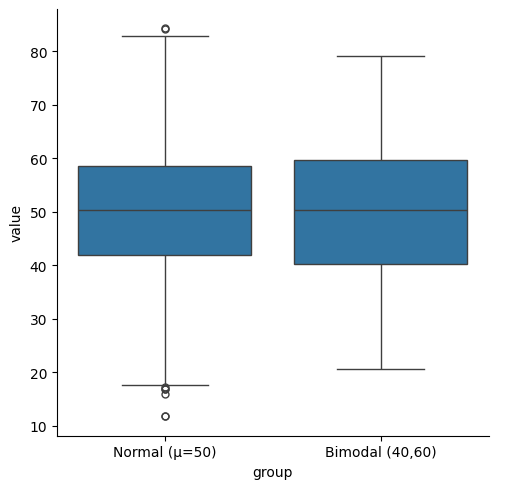

In [3]:
sns.catplot(data=df,
            x="group",
            y="value",            
            kind="box");

## Boxplot
Boxplots summarize center and spread; with the wider normal std, both boxes appear more similar despite different underlying shapes. We save the plot to disk.

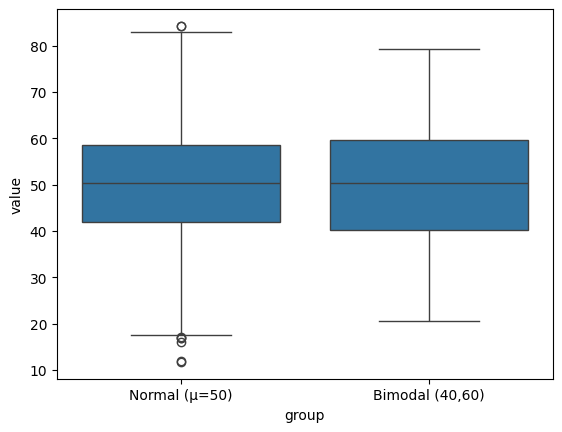

In [6]:
sns.boxplot(data=df, 
            x="group", 
            y="value");

## Violin plot
Violin plots display the full density, clearly revealing the two peaks of the bimodal distribution even when the boxplots look similar. We save the plot to disk.

<Axes: xlabel='group', ylabel='value'>

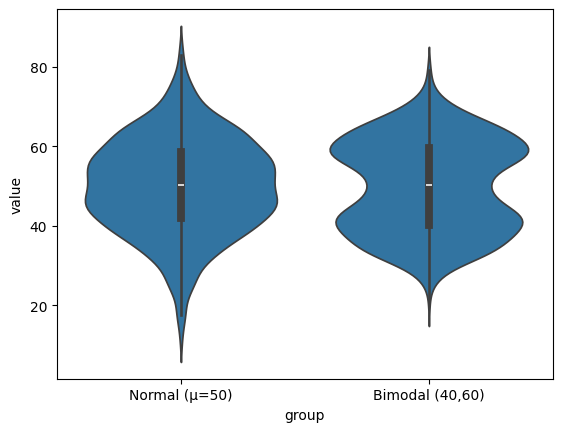

In [5]:
sns.violinplot(data=df, x="group", y="value")